<a href="https://colab.research.google.com/github/PaSeitz/Barcode-Detection-UNET/blob/main/barcode_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download** the model and test images

In [41]:
import gdown

url_model = 'https://drive.google.com/u/0/uc?id=1FodPfpkwXmkzQZRqZDBTpheVa_OgAx_p'
output_model_file_name = 'model.zib'
gdown.download(url_model, output_model_file_name, quiet=False) 

url_test_images = 'https://drive.google.com/u/0/uc?id=1_MDX0yGItjXOc-igVBLRCTSalvzynm1Q'
output_test_images_file_name = 'test_images.zib'
gdown.download(url_test_images, output_test_images_file_name, quiet=False) 

Downloading...
From: https://drive.google.com/u/0/uc?id=1FodPfpkwXmkzQZRqZDBTpheVa_OgAx_p
To: /content/model.zib
319MB [00:01, 248MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1_MDX0yGItjXOc-igVBLRCTSalvzynm1Q
To: /content/test_images.zib
100%|██████████| 426k/426k [00:00<00:00, 60.2MB/s]


'test_images.zib'

**Unzip** the files

In [44]:
import os
import zipfile

model_folder_name = 'model'
test_images_folder_name = 'test_images'

try:
  os.mkdir(model_folder_name)
except FileExistsError:
  print('Folder for ' + model_folder_name + 'already exists')

try:
  os.mkdir(test_images_folder_name)
except FileExistsError:
  print('Folder for ' + test_images_folder_name + 'already exists')

with zipfile.ZipFile(output_model_file_name, 'r') as zip_ref:
    zip_ref.extractall(model_folder_name)

with zipfile.ZipFile(output_test_images_file_name, 'r') as zip_ref:
    zip_ref.extractall(test_images_folder_name)

**Import** tensorflow and load the model

In [49]:
import tensorflow as tf
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# --- DO NOT CHANGE ---
IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3
# ---------------------

model = tf.keras.models.load_model('model/barcode_model')

1/1 [==============================] - 0s 2ms/step


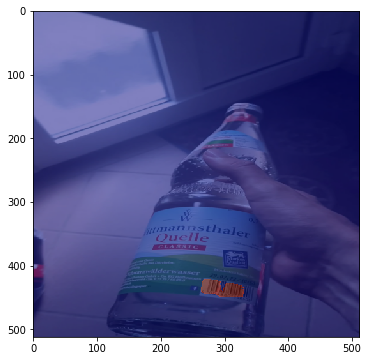

In [56]:
def load_test_image(index):
  X = np.zeros((1,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
  img = imread(test_images_folder_name + '/Test Images/barcode_test_images (' + str(index) + ').jpg')
  img = resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True)
  X[0] = img
  return X

X = load_test_image(4)
prediction = model.predict(X,verbose=1)
plt.figure(figsize = (8,6))
plt.imshow(X[0], 'gray', interpolation='none')
prediction[prediction <= 0.90] = 0
plt.imshow(np.squeeze(prediction[0]), 'jet', interpolation='none', alpha=0.5)
plt.show()